In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
import pathlib
data_dir = pathlib.Path('.\\CNN2\\train')
data_dir

WindowsPath('CNN2/train')

In [3]:
#list of image path for each catagory
hero_dic = {
    'Batman figurines': list(data_dir.glob('Batman figurines/*')),
    'Iron Man figurines': list(data_dir.glob('Iron Man figurines/*')),
    'Monkey D. Luffy figurines': list(data_dir.glob('Monkey D. Luffy figurines/*')),
    'Naruto Uzumaki figurines': list(data_dir.glob('Naruto Uzumaki figurines/*')),
    'Spider Man figurines': list(data_dir.glob('Spider Man figurines/*'))
}

In [4]:
len(hero_dic['Spider Man figurines'])

100

In [5]:
hero_dic['Spider Man figurines'][:5]

[WindowsPath('CNN2/train/Spider Man figurines/Image_1.jpg'),
 WindowsPath('CNN2/train/Spider Man figurines/Image_10.jpg'),
 WindowsPath('CNN2/train/Spider Man figurines/Image_100.jpg'),
 WindowsPath('CNN2/train/Spider Man figurines/Image_11.jpg'),
 WindowsPath('CNN2/train/Spider Man figurines/Image_12.jpg')]

In [6]:
dic = {'Batman figurines': 0,
 'Iron Man figurines': 1,
 'Monkey D. Luffy figurines': 2,
 'Naruto Uzumaki figurines': 3,
 'Spider Man figurines': 4}

In [7]:
X, y = [], []

#name take keys and image take list of path
for name, images in hero_dic.items():
    for image in images:             #image - single image path
        img = cv2.imread(str(image)) #windows path to str path , cv2 accepts only str, cv2 converts img to list of numbers
        resized_img = cv2.resize(img,(200,200)) #making all img of same size
        X.append(resized_img)
        y.append(dic[name]) #converts label to numbers 0,1,2,3,4

In [8]:
#list to numpy array
X = np.array(X)
y = np.array(y)

In [9]:
y[:5]

array([0, 0, 0, 0, 0])

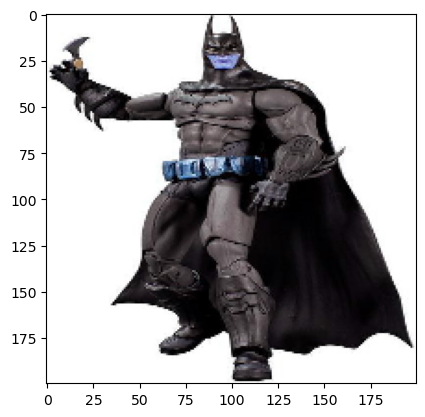

In [10]:
plt.imshow(X[0])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)

In [12]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [13]:
model = Sequential([
  layers.RandomFlip("horizontal",input_shape=(200, 200, 3)),
  layers.RandomRotation(0.1),
  layers.RandomZoom(0.1),  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(5, activation='softmax')
])

C:\Users\premk\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(X_train_scaled, y_train, epochs=30, batch_size=10) 

Epoch 1/30


C:\Users\premk\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - accuracy: 0.1874 - loss: 2.1662
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.2507 - loss: 1.5959
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - accuracy: 0.4265 - loss: 1.4118
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.5596 - loss: 1.1027
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.5815 - loss: 0.9833
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7103 - loss: 0.7712
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7749 - loss: 0.6017
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.8085 - loss: 0.5713
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.8330 - loss: 0.4701
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8363 - loss: 0.4433
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.8300 - loss: 0.4935
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - accuracy: 0.8435 - l

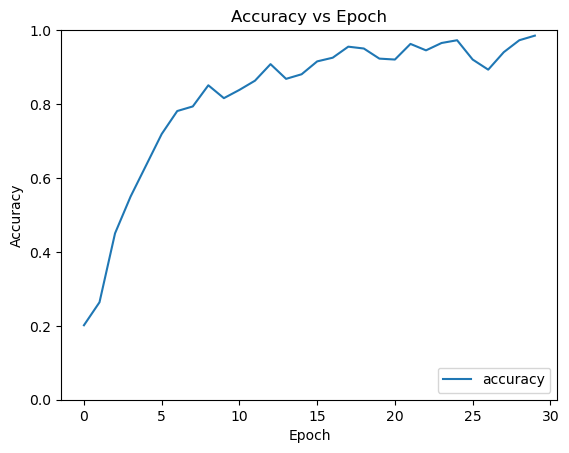

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Accuracy vs Epoch')
plt.show()

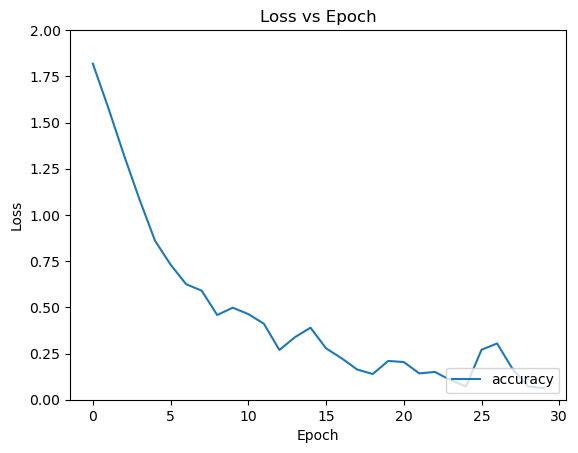

In [16]:
plt.plot(history.history['loss'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='lower right')
plt.title('Loss vs Epoch')
plt.show()

In [17]:
loss,accu = model.evaluate(X_test_scaled,y_test)
print('Test accuracy = ',accu)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8808 - loss: 0.6788
Test accuracy =  0.8712871074676514


In [18]:
listofnames=[]
for i in dic:
    listofnames.append(i)
listofnames

['Batman figurines',
 'Iron Man figurines',
 'Monkey D. Luffy figurines',
 'Naruto Uzumaki figurines',
 'Spider Man figurines']

In [19]:
def predict_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (200, 200))
    img_array = np.array(img_resized, dtype=np.float32) / 255.0 #uint8 to float

    img_array = np.expand_dims(img_array, axis=0)  # Expand dims to fit the model input - 4D array

    predictions = model.predict(img_array) #returns prob distri
    predicted_class = np.argmax(predictions, axis=1) #stores as numpy array so index
    
    return listofnames[predicted_class[0]]

In [20]:
from tensorflow.keras.preprocessing import image
def showimg(path):
    img = image.load_img(path)
    plt.imshow(img)

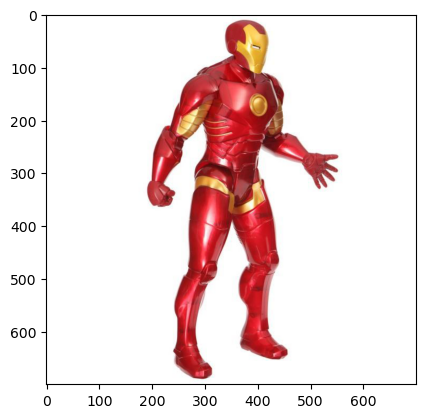

In [21]:
showimg('CNN/validation/Iron Man figurines/Image_91.jpg')

In [22]:
predict_image('CNN/validation/Iron Man figurines/Image_91.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


'Iron Man figurines'

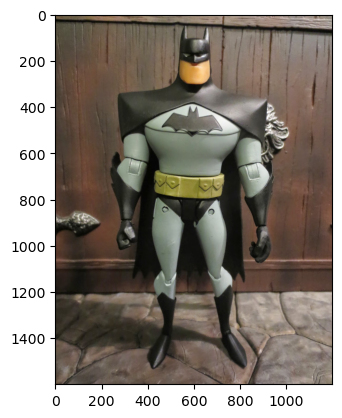

In [23]:
showimg('CNN/test/Batman figurines/Image_84.JPG')

In [24]:
predict_image('CNN/test/Batman figurines/Image_84.JPG')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


'Batman figurines'

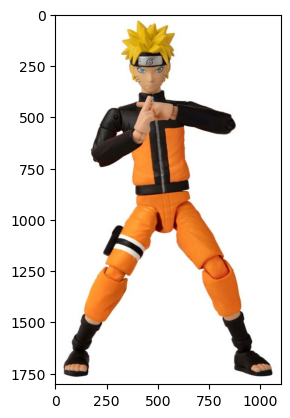

In [25]:
showimg('CNN/test/Naruto Uzumaki figurines/Image_95.jpg')

In [26]:
predict_image('CNN/test/Naruto Uzumaki figurines/Image_95.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'Naruto Uzumaki figurines'